1. Load the data
2. Convert RGB to vector?
3. Run Dimensionality reductions

In [2]:
!ls data

CALsuburb       MIThighway      MITopencountry  PARoffice       livingroom
MITcoast        MITinsidecity   MITstreet       bedroom
MITforest       MITmountain     MITtallbuilding kitchen


In [1]:
from skimage import io
import os

folders = ['CALsuburb', 'MIThighway', 'MITopencountry', 'PARoffice', 'livingroom', \
            'MITcoast', ' MITinsidecity',   'MITstreet', 'bedroom', \
            'MITforest', 'MITmountain', 'MITtallbuilding', 'kitchen']
images = []
max_images = 411

filenames = ['image_' + str(i+1).zfill(4) + '.jpg' for i in range(max_images)]

for folder in folders:
    for filename in filenames:
        new_filename = "data/" + folder + '/' + filename
        if os.path.isfile(new_filename):
            images.append([io.imread(new_filename), folders.index(folder)])

Mean length  245
Mean width  271


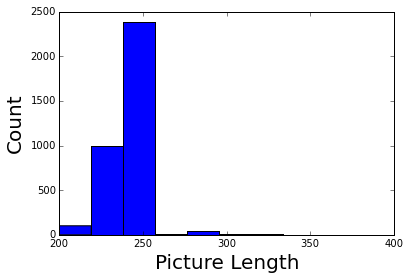

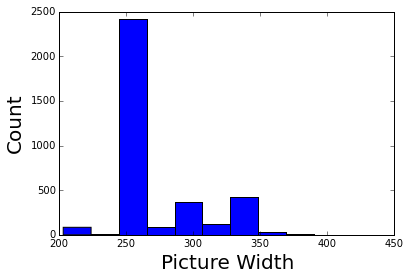

In [2]:
#Sizes seem to be generally similar...
lengths = [images[i][0].shape[0] for i in range(len(images))]
widths = [images[i][0].shape[1] for i in range(len(images))]

L = int(sum(lengths) * 1.0 / len(lengths))
W = int(sum(widths) * 1.0 /len(widths))

print "Mean length ", L
print "Mean width ", W

%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("Picture Length", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

plt.hist(widths)
plt.xlabel("Picture Width", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

Darn, it looks like the picture widths and lengths vary quite a bit. Hopefully scaling won't change by too much

In [3]:
# Scaling
from skimage import transform

for image in images:
    image[0] = transform.resize(image[0], (L, W))

In [4]:
import numpy as np
# Normalize all the pixels

flattened_images = [image[0].flatten() for image in images]
global_pixels = np.concatenate(flattened_images)

mean = np.mean(global_pixels)
std = np.std(global_pixels)

for image in images:
    image[0] = (image[0] - mean) / std

print "Mean of global_pixels ", mean
print "std of global_pixels ", std

Mean of global_pixels  0.454724616661
std of global_pixels  0.246327522891


In [ ]:
# write all the images out
directory = "normalized_data"
!mkdir $directory
counts = [0] * len(folders)
for image in images:
    class_index = image[1]
    image_class = folders[class_index]
    
    counts[class_index] += 1
    class_number = counts[class_index]
    
    filename = directory + "/" + image_class + "_" + str(class_number)
    np.save(filename, image[0])
    
!ls $directory